# Dynamical System

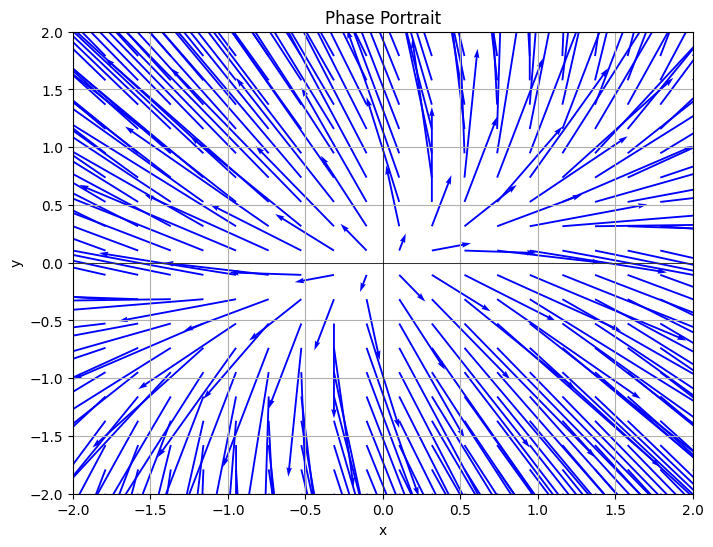

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system functions
def phi(x, y):
    return 0.5*x + -0.3*y

def psi(x, y):
    return -0.2*x + 0.9*y

# Create a grid of x and y values
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the derivatives using the system functions
X_dot = phi(X, Y)
Y_dot = psi(X, Y)

# Create a quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, X_dot, Y_dot, angles='xy', scale_units='xy', scale=0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


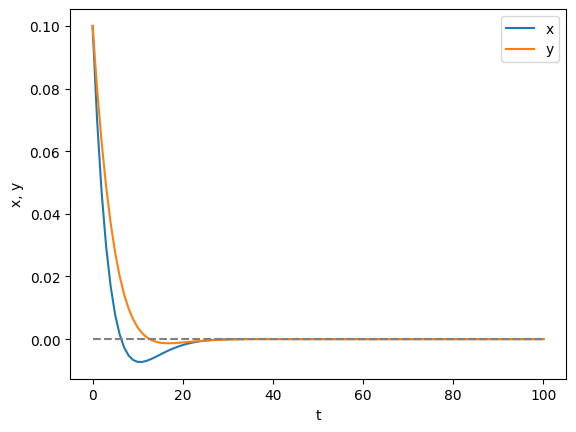

In [3]:
# illustrate the dynamics of the system and print the results

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# parameters
a = 0.9
b = -0.2
c = 0.1
d = 0.7

# Define the system functions
def phi(x, y):
    return a*x + b*y

def psi(x, y):
    return c*x + d*y

x = [0.1]
y = [0.1]
t = [0]

for i in range(100):
    t.append(t[i] + 1)
    x.append(phi(x[i], y[i]))
    y.append(psi(x[i], y[i]))

# plot
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('t')
plt.ylabel('x, y')
plt.hlines(0, 0, 100, colors='grey', linestyles='dashed')
plt.legend()

# save fig as pdf
#plt.savefig('lin_sys.pdf', bbox_inches='tight', dpi=300)

# Cobweb Model

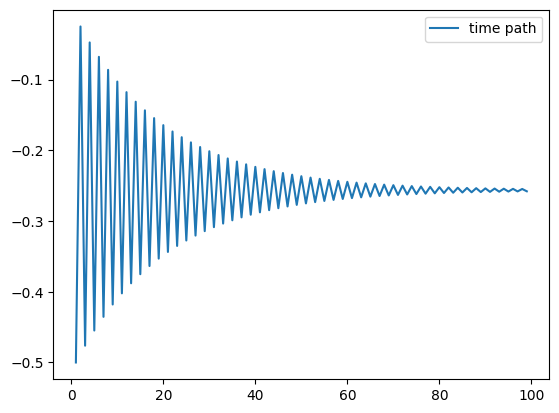

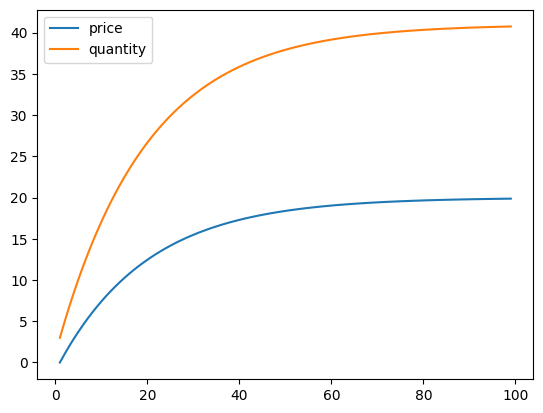

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

'''
given variables
a0: intercept of the demand curve(+ve) #gamma
b0: slope of the demand curve(-ve) #delta
a1: intercept of the supply curve(-ve) # N*alpha/(2*beta)) 
b1: slope of the supply curve(+ve) # N/(2*beta)
t: period
x0: period0 price

generated variables
x1: period1 price
pp: intertemporal eqm price
time_path: time path
dd: eqm demand
ss: eqm supply
in eqm condition dd and ss should and would be the same
'''

x0= sym.symbols('x0')
a0= sym.symbols('a0')
a1= sym.symbols('a1')
b0= sym.symbols('b0')
b1= sym.symbols('b1')
p0= sym.symbols('p0')
q0= sym.symbols('q0')
t= sym.symbols('t')

x1= (a1- a0)- (b1/b0)*x0
dd= a0+ b0*x1
ss= a1 + b1*x0
pp= -((a0-a1)/(b0-b1))
time_path_fn= ((p0- pp)*(b0/b1)**-t)+ pp
qq = a0 - b0 * x1

time_path=[]
solve= []
t1= list(range(1, 100))
x= 0
bi_pasa0= []
bi_qasa0= []
bi_pasa1= []
d=[]
s=[]

val_set1 = [1, -2, 2, 1.9, 0]
val_set2 = [2, -2, 5, 1.5, 4]

for i in t1:
  values= [1, -2, 2, 1.9, 0]
  x_1= x1.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])])
  op= time_path_fn.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3]), (p0, values[4]), (t, i)])
  time_path.append(op)
  d.append(dd.subs([(x1, x_1), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])]))
  s.append(ss.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])]))
  q= qq.subs([(x1, x_1), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])])
  bi_pasa0.append(x)
  bi_pasa1.append(x_1)
  bi_qasa0.append(q)
  x= x_1
plt.plot(t1, time_path, label= 'time path')
plt.legend()
plt.show()
plt.plot(t1, bi_pasa0, label= 'price')
plt.plot(t1, bi_qasa0, label= 'quantity')
plt.legend()
plt.show()
# plot of demand and supply

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
T = np.arange(n)
q = np.zeros(n)
p = np.zeros(n)
S = np.zeros(n)
D = np.zeros(n)

# parameters
alpha = 2
beta = -2
gamma = 5
delta = 1.5
N = 3

# params
a = N / (2 * beta * delta)
b = (alpha * N + 2 * beta * gamma) / (2*beta*gamma)

# function to cal p
def cal_q(p):
    return (p-alpha)/(2*beta)

def cal_S(p):
    return N*(p-alpha)/(2*beta)

def cal_D(p):
    return gamma - delta*p

# initial values

T[0] = 0
q[0] = 0.5
p[0] = 1
D[0] = cal_D(p[0])
S[0] = cal_S(p[0])

# equilibrium
pp = b/(1-a)
qq = cal_q(pp)

# simulation
for t in range(1, n):
    T[t] = t
    p[t] = pp + (-a)**t * (p[0] - pp)
    q[t] = cal_q(p[t])
    S[t] = cal_S(p[t])
    D[t] = cal_D(p[t])

In [29]:
# print
print("a: ", a)
print("b: ", b)
print("pp: ", pp)
print("qq: ", qq)
print("p: ", p)
print("q: ", q)

a:  -0.5
b:  0.7
pp:  0.4666666666666666
qq:  0.38333333333333336
p:  [1.         0.73333333 0.6        0.53333333 0.5        0.48333333
 0.475      0.47083333 0.46875    0.46770833 0.4671875  0.46692708
 0.46679687 0.46673177 0.46669922 0.46668294 0.4666748  0.46667074
 0.4666687  0.46666768 0.46666718 0.46666692 0.46666679 0.46666673
 0.4666667  0.46666668 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667
 0.46666667 0.46666667 0.46666667 0.46666667 0.46666667 0.4

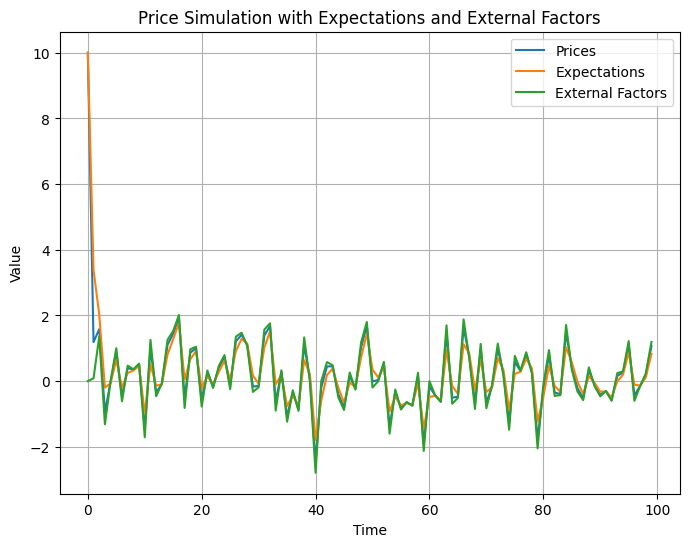

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
psi = 0.5  # You can adjust this value
alpha = psi / (1 + psi)
beta = 1 / (1 + psi)

# Initial conditions
initial_price = 10  # You can set your own initial price
initial_expectation = initial_price  # Initial expectation for future price
initial_external_factor = 0  # Initial external factor

# Number of periods to simulate
num_periods = 100

# Lists to store simulation results
prices = [initial_price]
expectations = [initial_expectation]
external_factors = [initial_external_factor]

# Simulate the dynamics
for t in range(1, num_periods):
    # Compute new external factor (you can define this based on some pattern or random process)
    external_factor = np.random.normal(0, 1)  # Example: Using normal distribution for randomness

    # Calculate new price expectation and price using the equation
    new_expectation = alpha * expectations[t - 1] + beta * external_factor
    new_price = alpha * new_expectation + beta * external_factor

    # Append results to lists
    expectations.append(new_expectation)
    prices.append(new_price)
    external_factors.append(external_factor)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(num_periods), prices, label='Prices')
plt.plot(range(num_periods), expectations, label='Expectations')
plt.plot(range(num_periods), external_factors, label='External Factors')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Price Simulation with Expectations and External Factors')
plt.legend()
plt.grid(True)
#plt.savefig('price_fluc', bbox_inches='tight', dpi=300)
